In [ ]:
import pickle
import pprint

obj = pickle.load(open("params.pickle", "rb"))

with open("params.txt", "a") as f:
        pprint.pprint(obj, stream=f)

In [2]:
import pickle
import pprint

obj = pickle.load(open("params.pkl", "rb"))

with open("params.txt", "a") as f:
        pprint.pprint(obj, stream=f)

In [3]:
import pickle
import ast

# Read the text file and parse it back to a Python object
with open("params.txt", "r") as f:
    content = f.read()
    obj = ast.literal_eval(content)  # Safely evaluates string to Python object

# Save the object back to a .pkl file
with open("params_back.pkl", "wb") as f:
    pickle.dump(obj, f)


### JSON Prompt

Node Attributes:
Name: Balcony, Category: Balcony, Location: north, Size: XS, Links: ['Living Room', 'Common Room 1'], ID: 0
Name: Bathroom 1, Category: Bathroom, Location: east, Size: XS, Links: ['Living Room'], ID: 1
Name: Bathroom 2, Category: Bathroom, Location: west, Size: S, Links: ['Master Bedroom', 'Common Room 2'], ID: 2
Name: Common Room 1, Category: SecondRoom, Location: northeast, Size: M, Links: ['Balcony'], ID: 3
Name: Common Room 2, Category: SecondRoom, Location: northwest, Size: M, Links: ['Kitchen', 'Living Room', 'Bathroom 2'], ID: 4
Name: Kitchen, Category: Kitchen, Location: north, Size: S, Links: ['Living Room', 'Common Room 2'], ID: 5
Name: Living Room, Category: LivingRoom, Location: southeast, Size: XL, Links: ['Balcony', 'Bathroom 1', 'Common Room 2', 'Kitchen', 'Master Bedroom', 'Dining Room'], ID: 6
Name: Master Bedroom, Category: MasterRoom, Location: southwest, Size: L, Links: ['Living Room', 'Bathroom 2'], ID: 7
Name: Dining Room, Category: DiningRoom, Lo

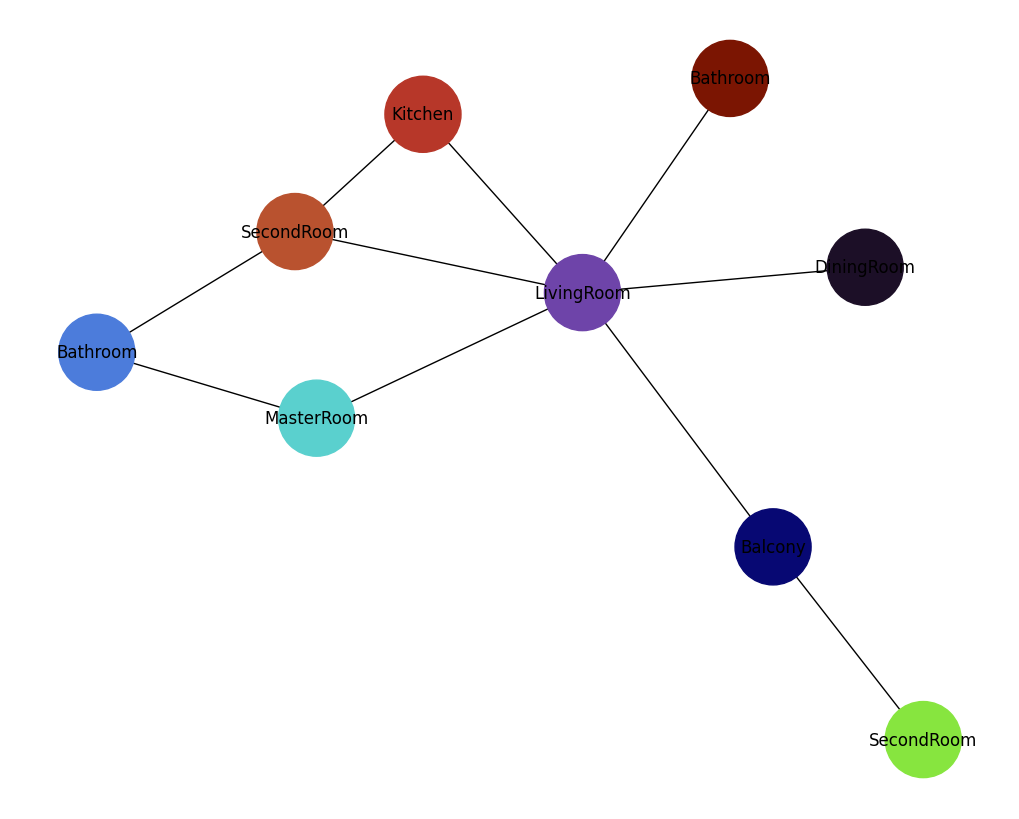

In [3]:
import json
import dgl
import networkx as nx
import matplotlib.pyplot as plt
import random
from denoising_diffusion_pytorch.graph_encoder import get_nodes

json_path = "floor_plan.json"
with open(json_path, "r") as file:
    json_data = json.load(file)

json_string = json.dumps(json_data)

nodes = get_nodes(json_string)

print("Node Attributes:")
for node in nodes:
    print(f"Name: {node.name}, Category: {node.category}, Location: {node.location}, Size: {node.size}, Links: {node.link}, ID: {node.id}")

graph = nx.Graph()

for node in nodes:
    graph.add_node(node.name, type=node.category, location=node.location, size=node.size)
    for linked_node_name in node.link:
        graph.add_edge(node.name, linked_node_name)

node_colors = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in graph.nodes]

plt.figure(figsize=(10, 8))

pos = nx.spring_layout(graph)
nx.draw(
    graph, pos, with_labels=False, node_size=3000, node_color=node_colors, font_size=10, font_weight="bold"
)

node_labels = {node: graph.nodes[node]['type'] for node in graph.nodes}
nx.draw_networkx_labels(graph, pos, labels=node_labels, font_color="black")
plt.show()


Node Attributes with Tokenized:
Name: Balcony
  - Category: Balcony, Embedding: [ 1.92807153e-01 -2.45839760e-01 -5.89259267e-01 -4.14612144e-01
  1.17281266e-01  8.54795277e-02  2.41720051e-01 -5.49404204e-01
  4.62871403e-01 -3.51337552e-01 -8.08348507e-02 -7.54038915e-02
  6.16381705e-01 -5.86628914e-01  4.54113722e-01 -4.57672060e-01
  1.48881711e-02 -3.60065013e-01  3.67552698e-01  1.70758754e-01
 -7.35279083e-01  2.46819735e-01  1.95648968e-02  2.95306891e-01
  2.63703108e-01  3.43237817e-01 -4.78711277e-01  2.56895810e-01
 -8.39506984e-02 -3.36840063e-01  1.51970714e-01  4.27139789e-01
 -2.98699200e-01 -7.30602145e-02 -6.49701715e-01  4.98008072e-01
 -3.92041057e-01 -2.29364723e-01  3.99100453e-01 -5.54097444e-02
 -3.13026682e-02 -3.66107166e-01 -4.04588073e-01  4.64209139e-01
  2.08592996e-01 -6.21954322e-01 -5.13339043e-01 -4.48124148e-02
 -1.58151329e-01  3.91650975e-01  3.27663392e-01  3.42638940e-01
  1.19361378e-01  3.65692466e-01  3.88505310e-01 -4.94158387e-01
 -3.121723

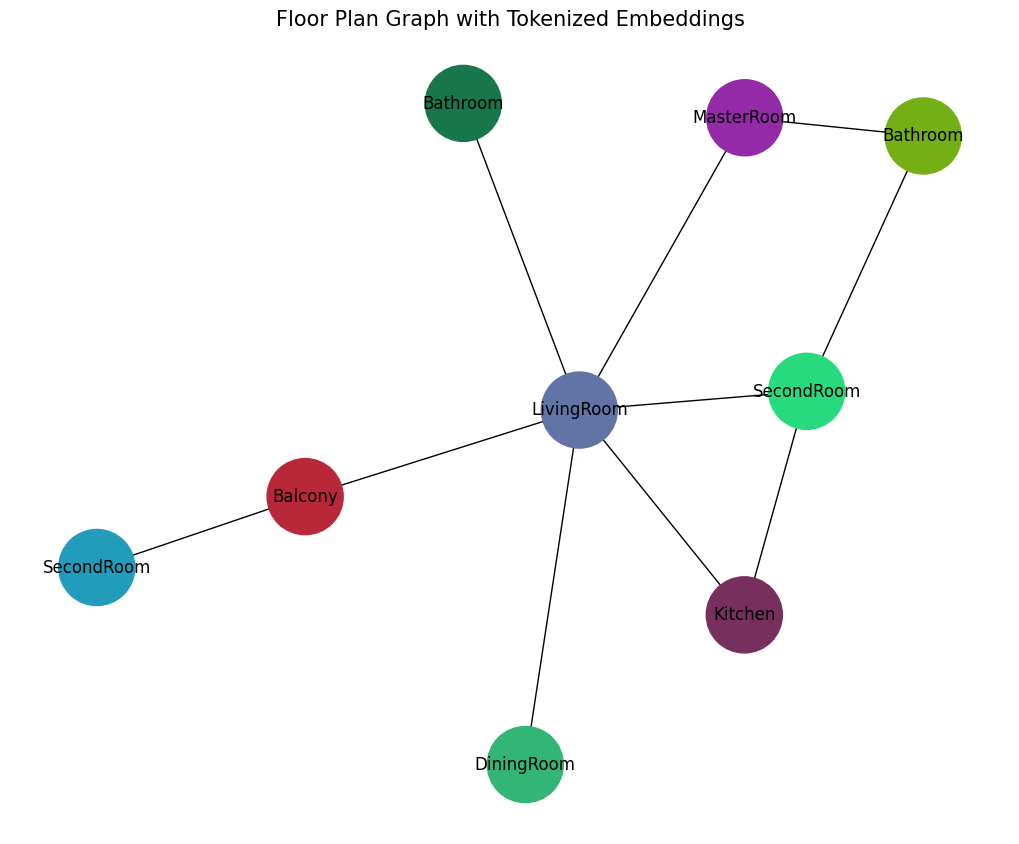

In [7]:
import json
import dgl
import networkx as nx
import matplotlib.pyplot as plt
import random
from denoising_diffusion_pytorch.graph_encoder import collate, get_nodes, get_dgl, room_category, room_location, room_size

# Load the JSON data
json_path = "floor_plan.json"
with open(json_path, "r") as file:
    json_data = json.load(file)

json_string = json.dumps(json_data)

# Extract nodes using get_nodes
nodes = get_nodes(json_string)

# Print the node attributes and tokenized embeddings
print("Node Attributes with Tokenized:")
for node in nodes:
    category_embedding = room_category.get(node.category, room_category["Unknown"])
    location_embedding = room_location.get(node.location, room_location["Unknown"])
    size_embedding = room_size.get(node.size, room_size["Unknown"])
    print(f"Name: {node.name}")
    print(f"  - Category: {node.category}, Embedding: {category_embedding}")
    print(f"  - Location: {node.location}, Embedding: {location_embedding}")
    print(f"  - Size: {node.size}, Embedding: {size_embedding}")
    print(f"  - Links: {node.link}, ID: {node.id}\n")

# Create a graph using NetworkX
graph = nx.Graph()

# Add nodes and edges to the graph
for node in nodes:
    graph.add_node(node.name, type=node.category, location=node.location, size=node.size)
    for linked_node_name in node.link:
        graph.add_edge(node.name, linked_node_name)

# Assign random colors to nodes
node_colors = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in graph.nodes]

# Visualize the graph
plt.figure(figsize=(10, 8))

# Draw the graph without labels
pos = nx.spring_layout(graph)
nx.draw(
    graph, pos, with_labels=False, node_size=3000, node_color=node_colors, font_size=10, font_weight="bold"
)

# Add node labels
node_labels = {node: graph.nodes[node]['type'] for node in graph.nodes}
nx.draw_networkx_labels(graph, pos, labels=node_labels, font_color="black")

plt.title("Floor Plan Graph with Tokenized Embeddings", fontsize=15)
plt.show()


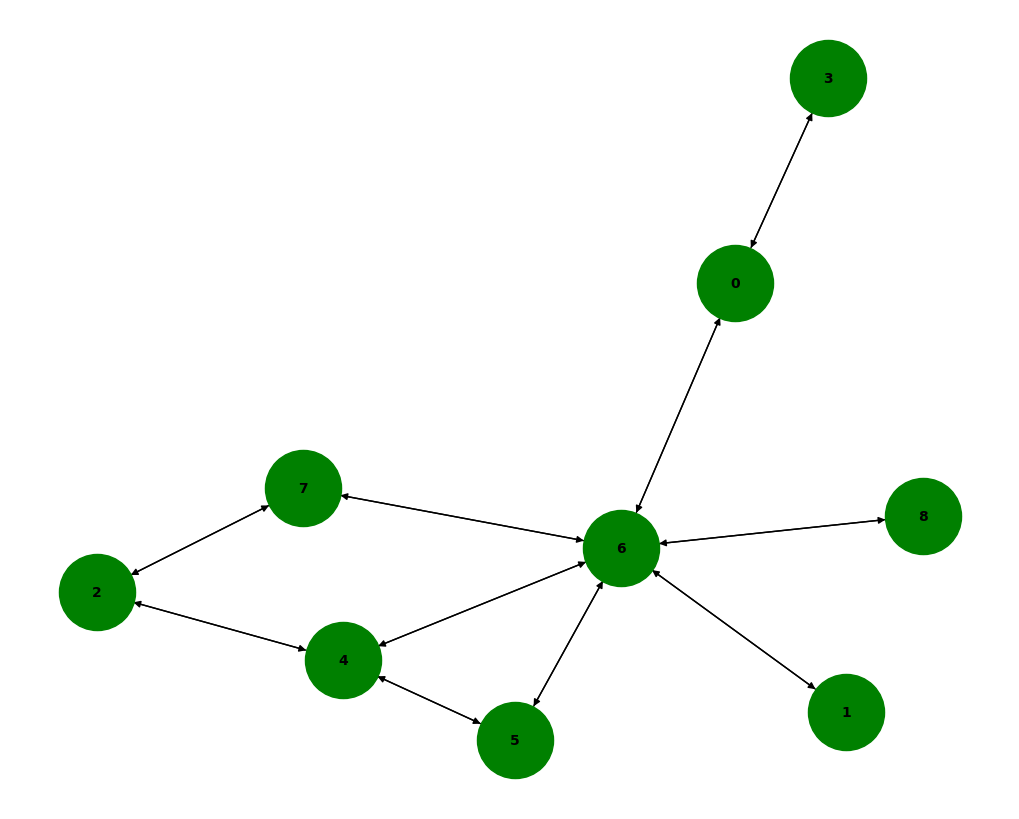

In [8]:
dgl_graph = get_dgl(nodes, mask=0.1)

nx_graph = dgl.to_networkx(dgl_graph)

plt.figure(figsize=(10, 8))

pos = nx.spring_layout(nx_graph)  
nx.draw(
    nx_graph,
    pos,
    with_labels=True,
    node_size=3000,
    node_color="green",
    font_size=10,
    font_weight="bold",
)

plt.show()


In [ ]:
from denoising_diffusion_pytorch.graph_encoder import collate, get_nodes, get_dgl, room_category, room_location, room_size

import json
import random
import numpy as np
import torch

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
    
# Load the JSON data
json_path = "floor_plan.json"
with open(json_path, "r") as file:
    json_data = json.load(file)

# Parse JSON string into nodes
json_string = json.dumps(json_data)
nodes = get_nodes(json_string)

pyg_graph = get_dgl(nodes, mask=0.1)
collate_outputs = collate([pyg_graph])  

# Unpack collate outputs
attn_mask, node_feat, in_degree, out_degree, path_data, dist = collate_outputs

# Print each output from collate
print("Output of Collate:")

print("\nAttention Mask (attn_mask):") # Indicates which positions in the graph are valid for attention.
print(attn_mask)
print(f"Shape: {attn_mask.shape}")

print("\nNode Features (node_feat):") # Concatenated features (category, location, size) of all nodes in the graph.
print(node_feat)
print(f"Shape: {node_feat.shape}")

print("\nIn-Degree (in_degree):")  # Clamped in-degree and out-degree of each node in the graph.
print(in_degree)
print(f"Shape: {in_degree.shape}") # The number of edges directed toward a node.

print("\nOut-Degree (out_degree):")
print(out_degree)
print(f"Shape: {out_degree.shape}") # The number of edges directed away from a node.

print("\nPath Data (path_data):") # Encodes shortest paths between nodes up to multi_hop_max_dist.
print(path_data)
print(f"Shape: {path_data.shape}") # The maximum number of "hops" (edges) to consider when calculating shortest paths between nodes in the graph.

print("\nShortest Distances (dist):") # Shortest distances between nodes in the graph.
print(dist)
print(f"Shape: {dist.shape}") # Helps capture relationships between nodes within a manageable scope, avoiding excessive computation for distant nodes.


Output of Collate:

Attention Mask (attn_mask):
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]])
Shape: torch.Size([1, 11, 11])

Node Features (node_feat):
tensor([[[ 0.1928, -0.2458, -0.5893,  ..., -0.0091, -0.3679, -0.2132],
         [ 0.0454,  0.2378,  0.0498,  ..., -0.0091, -0.3679, -0.2132],
         [ 0.0454,  0.2378,  0.0498,  ..., -0.0881, -0.0915, -0.0280],
         ...,
         [ 0.0168, -0.1207, -0.0375,  ...,  0.0342,  0.0153

In [14]:
print("DGL num_nodes:", node_feat)
print("DGL path_data:", path_data[:2, :2])
print("DGL path_data sample:", path_data[0, :2, :2])


DGL num_nodes: tensor([[[ 0.1928, -0.2458, -0.5893,  ..., -0.0091, -0.3679, -0.2132],
         [ 0.0454,  0.2378,  0.0498,  ..., -0.0091, -0.3679, -0.2132],
         [ 0.0454,  0.2378,  0.0498,  ..., -0.0881, -0.0915, -0.0280],
         ...,
         [ 0.0168, -0.1207, -0.0375,  ...,  0.0342,  0.0153,  0.1622],
         [ 0.4547, -0.1293, -0.4530,  ..., -0.4424,  0.6713,  0.2250],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]])
DGL path_data: tensor([[[[[0.],
           [0.],
           [0.],
           [0.]],

          [[1.],
           [1.],
           [0.],
           [0.]],

          [[1.],
           [1.],
           [1.],
           [0.]],

          [[0.],
           [0.],
           [0.],
           [0.]],

          [[1.],
           [1.],
           [0.],
           [0.]],

          [[1.],
           [1.],
           [0.],
           [0.]],

          [[1.],
           [0.],
           [0.],
           [0.]],

          [[1.],
           [1.],
    

In [5]:
import torch
from denoising_diffusion_pytorch.graphormer import Graphormer 
from denoising_diffusion_pytorch.graph_encoder import collate, get_nodes, get_dgl, room_category, room_location, room_size
import json
import random
import numpy as np
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
    
# Load the JSON data
json_path = "floor_plan.json"
with open(json_path, "r") as file:
    json_data = json.load(file)

# Parse JSON string into nodes
json_string = json.dumps(json_data)
nodes = get_nodes(json_string)

pyg_graph = get_dgl(nodes, mask=0.1)
collate_outputs = collate([pyg_graph])  

# Unpack collate outputs
attn_mask, node_feat, in_degree, out_degree, path_data, dist = collate_outputs 

# Graphormer model
graphormer = Graphormer(
    edge_dim=1,               # Dimension of edge features
    in_feature=node_feat.size(-1),  # Number of features in each node (from node_feat)
    max_degree=4,             # Maximum degree for DegreeEncoder
    num_spatial=4,            # Maximum distance for SpatialEncoder
    multi_hop_max_dist=4,     # Maximum distance for PathEncoder
    num_encoder_layers=6,     # Number of transformer layers
    embedding_dim=64,         # Size of embedding dimension
    ffn_embedding_dim=64,     # Feedforward network dimension
    num_attention_heads=8,    # Number of attention heads
    dropout=0.1,              # Dropout rate
    pre_layernorm=True,       # Whether to use pre-layer normalization
)

device = "cuda" if torch.cuda.is_available() else "cpu"
graphormer.to(device)

attn_mask = attn_mask.to(device)
node_feat = node_feat.to(device)
in_degree = in_degree.to(device)
out_degree = out_degree.to(device)
path_data = path_data.to(device)
dist = dist.to(device)

graph_representation = graphormer(
    node_feat=node_feat,
    in_degree=in_degree,
    out_degree=out_degree,
    path_data=path_data,
    dist=dist,
    attn_mask=attn_mask,
)

print("Graph Representation Shape:", graph_representation.shape)
print("Graph Representation Tensor:", graph_representation)


Graph Representation Shape: torch.Size([1, 10, 64])
Graph Representation Tensor: tensor([[[ 3.4044,  0.3298,  0.6032, -1.1091, -3.6602, -1.0650,  1.0865,
           0.0913,  3.0059, -0.1457, -0.2570, -1.0085, -0.9135, -1.3193,
           2.5564, -1.2966, -1.9296, -0.0074, -0.1831,  2.1376, -0.3159,
          -0.6682, -1.2588, -3.7696,  1.7024,  0.7544, -2.8060, -2.8086,
           0.6311,  1.7725,  2.5328, -1.7741, -2.6127, -1.7804, -0.9121,
           0.4506,  0.0370, -2.5057, -0.3480, -0.6199, -0.8956,  1.7336,
          -2.1079, -1.2015,  0.4658,  4.3201, -1.6057, -2.8332,  1.7232,
           0.3302,  1.2800, -2.3150,  2.7930,  1.0025,  2.9898,  1.0964,
           1.2654,  0.7148,  0.7227,  2.5575,  1.7299, -0.7399, -0.6310,
           1.7579],
         [ 2.5317,  1.1433, -0.1952, -0.9128, -2.7842, -0.6995,  1.1672,
           0.9916,  2.8641, -2.0586,  0.5871, -0.4198,  0.5680, -0.0094,
           1.7609, -0.1474, -1.8300, -0.1532, -0.2824,  2.0518, -0.7670,
           0.0087, -1.5

In [ ]:
import json
from openai import OpenAI
from prompt2json import prompt2json, updatePrompt

with open("api_info.json", "r") as f:
    api_info = json.load(f)

client = OpenAI(
    api_key=api_info["api_key"],
    base_url=api_info["base_url"],
)
text = "This spacious two-bedroom apartment offers a comfortable and modern living environment, perfect for families or individuals seeking both style and functionality. A large hallway seamlessly connects the living areas, with the main bedroom providing a peaceful retreat and the second bedroom ideal for a child’s room or home office. The open-plan living and dining area is perfect for relaxing and hosting, with access to a private balcony for enjoying outdoor moments. The apartment also includes a contemporary bathroom and handy storage solutions like a utility room. The layout optimizes space and natural light, creating a welcoming and cozy atmosphere."


model = api_info.get("model", "gpt-4o")  

new_text, mid = prompt2json(text, client=client, model=model)

print("Generated JSON:", new_text)
print("MID:", mid)

output_data = {
    "generated_json": new_text,
    "mid": mid
}

output_file = "prompt2json.json"

with open(output_file, "w") as f:
    json.dump(output_data, f, indent=1)



{'rooms': [{'name': 'Hallway', 'type': 'Entrance', 'link': ['Living and Dining Area', 'Main Bedroom', 'Second Bedroom', 'Bathroom', 'Utility Room'], 'location': 'center', 'size': 'L'}, {'name': 'Main Bedroom', 'type': 'MasterRoom', 'link': ['Hallway'], 'location': 'northwest', 'size': 'L'}, {'name': 'Second Bedroom', 'type': 'ChildRoom', 'link': ['Hallway'], 'location': 'north', 'size': 'M'}, {'name': 'Living and Dining Area', 'type': 'LivingRoom', 'link': ['Hallway', 'Balcony'], 'location': 'south', 'size': 'XL'}, {'name': 'Balcony', 'type': 'Balcony', 'link': ['Living and Dining Area'], 'location': 'southeast', 'size': 'M'}, {'name': 'Bathroom', 'type': 'Bathroom', 'link': ['Hallway'], 'location': 'northeast', 'size': 'S'}, {'name': 'Utility Room', 'type': 'Storage', 'link': ['Hallway'], 'location': 'northeast', 'size': 'S'}]}
Generated JSON: {
  "Entrance": {
    "num": 1,
    "rooms": [
      {
        "name": "Hallway",
        "link": [
          [
            "Living and Dining 

In [10]:
print("Generated JSON:", new_text)
print("MID:", mid)

output_data = {
    "generated_json": new_text,
    "mid": mid
}

output_file = "prompt2json2.json"

with open(output_file, "w") as f:
    json.dump(output_data, f, indent=10)

Generated JSON: {
  "Entrance": {
    "num": 1,
    "rooms": [
      {
        "name": "Hallway",
        "link": [
          [
            "Living and Dining Area",
            "Main Bedroom",
            "Second Bedroom",
            "Bathroom",
            "Utility Room"
          ]
        ],
        "location": "center",
        "size": "L"
      }
    ]
  },
  "MasterRoom": {
    "num": 1,
    "rooms": [
      {
        "name": "Main Bedroom",
        "link": [
          [
            "Hallway"
          ]
        ],
        "location": "northwest",
        "size": "L"
      }
    ]
  },
  "ChildRoom": {
    "num": 1,
    "rooms": [
      {
        "name": "Second Bedroom",
        "link": [
          [
            "Hallway"
          ]
        ],
        "location": "north",
        "size": "M"
      }
    ]
  },
  "LivingRoom": {
    "num": 1,
    "rooms": [
      {
        "name": "Living and Dining Area",
        "link": [
          [
            "Hallway",
            "Balco